<a href="https://colab.research.google.com/github/paviayyala/AIML-Lab/blob/main/ml_stats_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 🛠️ Install missing libraries (run this only if you get import errors)

!pip install numpy matplotlib scipy pandas


In [ ]:
# Imports and setup
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import pandas as pd

# For inline plots in Colab
%matplotlib inline

print("Libraries loaded. Run the sections below one by one.")

Libraries loaded. Run the sections below one by one.


# 🛠️ Install missing libraries (run this only if you get import errors)

!pip install numpy matplotlib scipy pandas


# ML Statistics & Probability Demo Notebook
This notebook demonstrates **key statistical concepts** used in Machine Learning with clear explanations and runnable code cells for Google Colab:
- Probability Distribution (discrete & continuous)
- Bayes' Theorem (medical + spam examples)
- Hypothesis Testing (two-sample t-test)
- Confidence Interval (t-based 95% CI)
- A/B Testing (two-proportion z-test)

**How to use:** Run each cell in order in Colab. Each code cell contains detailed comments and prints explanations for students.


## 1) Probability Distribution
This section shows:
- A discrete distribution example (PMF for a fair six-sided die)
- A continuous distribution example (sampling from a Normal distribution and plotting histogram + PDF)

**Concept:** A probability distribution describes how probabilities are assigned to outcomes (discrete) or densities (continuous).

Discrete example: fair 6-sided die (PMF)
Face 1: P(X=1) = 0.167
Face 2: P(X=2) = 0.167
Face 3: P(X=3) = 0.167
Face 4: P(X=4) = 0.167
Face 5: P(X=5) = 0.167
Face 6: P(X=6) = 0.167


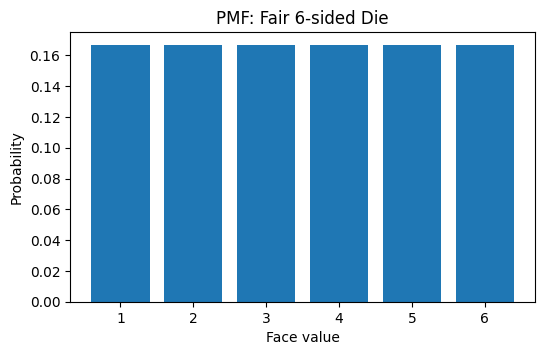


Continuous example: Normal distribution (sample histogram approximates PDF)
Sample mean ≈ 49.55, sample std ≈ 9.88


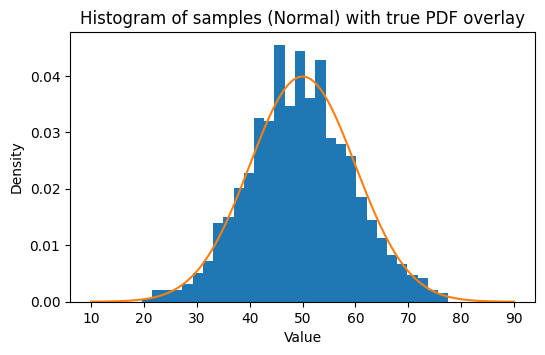

In [ ]:
# Discrete example: fair six-sided die (PMF)
faces = np.arange(1, 7)        # faces 1..6
pmf = np.ones_like(faces) / 6  # equal probability for a fair die
print("Discrete example: fair 6-sided die (PMF)")
for f, p in zip(faces, pmf):
    print(f"Face {f}: P(X={f}) = {p:.3f}")

plt.figure(figsize=(6,3.5))
plt.bar(faces, pmf)
plt.title("PMF: Fair 6-sided Die")
plt.xlabel("Face value")
plt.ylabel("Probability")
plt.xticks(faces)
plt.show()

# Continuous example: Normal distribution samples
np.random.seed(0)
samples = np.random.normal(loc=50, scale=10, size=1000)  # mean=50, std=10
print("\nContinuous example: Normal distribution (sample histogram approximates PDF)")
print(f"Sample mean ≈ {samples.mean():.2f}, sample std ≈ {samples.std(ddof=1):.2f}")

plt.figure(figsize=(6,3.5))
plt.hist(samples, bins=30, density=True)  # density=True so area ~ 1 (PDF-like)
x = np.linspace(10, 90, 300)
pdf = stats.norm.pdf(x, loc=50, scale=10)
plt.plot(x, pdf)
plt.title("Histogram of samples (Normal) with true PDF overlay")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

Discrete example: fair 6-sided die (PMF)
Face 1: P(X=1) = 0.167
Face 2: P(X=2) = 0.167
Face 3: P(X=3) = 0.167
Face 4: P(X=4) = 0.167
Face 5: P(X=5) = 0.167
Face 6: P(X=6) = 0.167


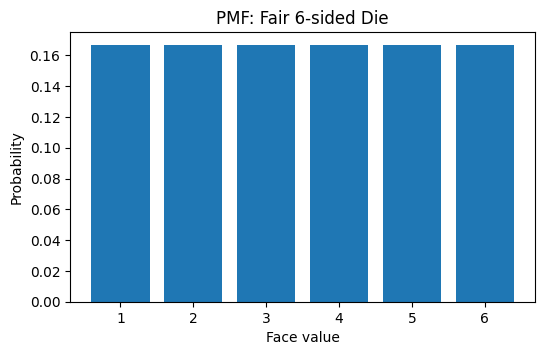


Continuous example: Normal distribution (sample histogram approximates PDF)
Sample mean ≈ 49.55, sample std ≈ 9.88


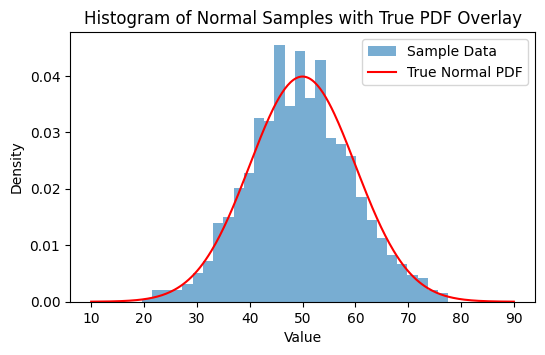

In [ ]:
# ==============================================
# Probability Distribution Examples
# ==============================================
# We will see:
#   1. Discrete Probability Distribution (fair die)
#   2. Continuous Probability Distribution (normal distribution)
# ==============================================

# Import necessary libraries
import numpy as np               # Used for numeric calculations and array handling
import matplotlib.pyplot as plt  # Used for plotting charts and visualizations
from scipy import stats          # Used for statistical functions (like normal PDF)

# ---------------------------------------------------
# 1️⃣ DISCRETE DISTRIBUTION: Fair Six-Sided Die
# ---------------------------------------------------

# Create an array of possible outcomes for a die: 1, 2, 3, 4, 5, 6
faces = np.arange(1, 7)

# For a fair die, all faces have equal probability (1/6 each)
# np.ones_like(faces) creates an array of ones with same size as 'faces'
pmf = np.ones_like(faces) / 6

# Print the probability of each face
print("Discrete example: fair 6-sided die (PMF)")
for f, p in zip(faces, pmf):                     # zip() pairs face and its probability
    print(f"Face {f}: P(X={f}) = {p:.3f}")       # print each face and probability value

# Plot the Probability Mass Function (PMF) using a bar chart
plt.figure(figsize=(6, 3.5))                     # set figure size for clear display
plt.bar(faces, pmf)                              # bar chart of face vs probability
plt.title("PMF: Fair 6-sided Die")               # chart title
plt.xlabel("Face value")                         # x-axis label
plt.ylabel("Probability")                        # y-axis label
plt.xticks(faces)                                # show 1 to 6 on x-axis
plt.show()                                       # display the chart

# ---------------------------------------------------
# 2️⃣ CONTINUOUS DISTRIBUTION: Normal Distribution
# ---------------------------------------------------

# Set random seed so results are reproducible (same every time you run)
np.random.seed(0)

# Generate 1000 random samples from a normal distribution
# loc = 50 → mean, scale = 10 → standard deviation
samples = np.random.normal(loc=50, scale=10, size=1000)

# Print sample mean and standard deviation to show it's close to expected values
print("\nContinuous example: Normal distribution (sample histogram approximates PDF)")
print(f"Sample mean ≈ {samples.mean():.2f}, sample std ≈ {samples.std(ddof=1):.2f}")

# Create a histogram of the sampled data
plt.figure(figsize=(6, 3.5))
# bins=30 → divide data into 30 groups, density=True → makes area under histogram = 1
plt.hist(samples, bins=30, density=True, alpha=0.6, label="Sample Data")

# Create x values from 10 to 90 for plotting the true Normal PDF curve
x = np.linspace(10, 90, 300)

# Compute the actual Probability Density Function (PDF) using the true parameters
pdf = stats.norm.pdf(x, loc=50, scale=10)

# Plot the true normal curve over the histogram for comparison
plt.plot(x, pdf, 'r', label="True Normal PDF")

# Add title and labels to the plot
plt.title("Histogram of Normal Samples with True PDF Overlay")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()                                    # show legend for clarity
plt.show()                                      # display the plot

# ==============================================
# End of program
# ==============================================


In [ ]:
# Hypothesis Testing — Two-sample t-test (simple, pasteable)
# H0: mean_after = mean_before  (no change)
# H1: mean_after > mean_before  (training increased average sales)

import numpy as np
from scipy import stats

# Example sample data: monthly sales (in thousands) for 8 reps before and after training
before = np.array([18, 20, 17, 19, 16, 21, 18, 19])  # mean ~ 18.5
after  = np.array([22, 24, 20, 23, 21, 25, 24, 22])  # mean ~ 22.625

# 1) Inspect sample means
mean_before = before.mean()
mean_after = after.mean()
print(f"Mean before = {mean_before:.2f}k, Mean after = {mean_after:.2f}k")

# 2) Perform two-sample (independent) t-test (Welch's t-test by default)
t_stat, p_two_sided = stats.ttest_ind(after, before, equal_var=False)

# 3) Convert two-sided p-value to one-sided p-value for H1: mean_after > mean_before
# If t_stat is positive (after > before), one-sided p = p_two_sided / 2; otherwise it's 1 - p_two_sided/2
if t_stat > 0:
    p_one_sided = p_two_sided / 2
else:
    p_one_sided = 1 - (p_two_sided / 2)

alpha = 0.05  # significance level

# 4) Print results and decision
print(f"t-statistic = {t_stat:.3f}")
print(f"one-sided p-value = {p_one_sided:.4f} (alpha = {alpha})")

if p_one_sided < alpha:
    print("Decision: Reject H0 → Training significantly increased average sales.")
else:
    print("Decision: Fail to reject H0 → No strong evidence training increased sales.")


Mean before = 18.50k, Mean after = 22.62k
t-statistic = 5.016
one-sided p-value = 0.0001 (alpha = 0.05)
Decision: Reject H0 → Training significantly increased average sales.


In [ ]:
import numpy as np
from scipy import stats

# Example sample data: monthly sales (in thousands) for 8 reps before and after training
before = np.array([18, 20, 17, 19, 16, 21, 18, 19])  # mean ~ 18.5
after  = np.array([22, 24, 20, 23, 21, 25, 24, 22])  # mean ~ 22.625

# 1) Inspect sample means
mean_before = before.mean()
mean_after = after.mean()
print(f"Mean before = {mean_before:.2f}k, Mean after = {mean_after:.2f}k")


Mean before = 18.50k, Mean after = 22.62k


In [ ]:
# 2) Perform two-sample (independent) t-test (Welch's t-test by default)
print (t_stat)
print(p_two_sided)
t_stat, p_two_sided = stats.ttest_ind(after, before, equal_var=False)
print (t_stat)
print(p_two_sided)

# 3) Convert two-sided p-value to one-sided p-value for H1: mean_after > mean_before
# If t_stat is positive (after > before), one-sided p = p_two_sided / 2; otherwise it's 1 - p_two_sided/2
if t_stat > 0:
    p_one_sided = p_two_sided / 2
else:
    p_one_sided = 1 - (p_two_sided / 2)

alpha = 0.05  # significance level

# 4) Print results and decision
print(f"t-statistic = {t_stat:.3f}")
print(f"one-sided p-value = {p_one_sided:.4f} (alpha = {alpha})")

5.015816567776793
0.00019029268992181648
5.015816567776793
0.00019029268992181648
t-statistic = 5.016
one-sided p-value = 0.0001 (alpha = 0.05)


✅ Libraries imported successfully!


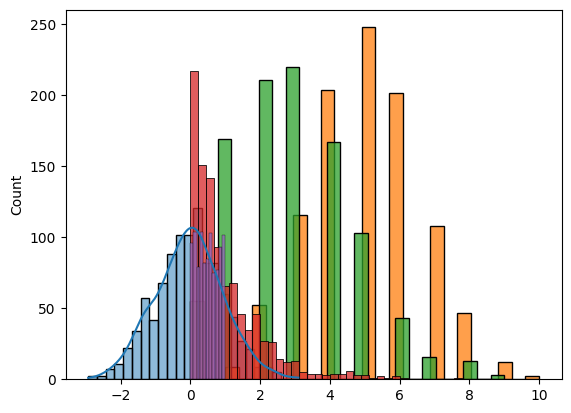

In [ ]:
# -----------------------------------------------
# Import commonly used Python libraries for Data Science
# -----------------------------------------------

import numpy as np                # numpy (np) → Used for numerical calculations and handling arrays,
                                 # matrices, and mathematical operations efficiently.

import matplotlib.pyplot as plt   # matplotlib.pyplot (plt) → Used for creating visualizations like charts,
                                 # graphs, and plots to see data patterns.

import seaborn as sns             # seaborn (sns) → A high-level visualization library built on top of Matplotlib
                                 # that makes beautiful and easy-to-read statistical plots.

# Optional: show that imports are successful
print("✅ Libraries imported successfully!")


sns.histplot(np.random.normal(0,1,1000), kde=True)  # Normal
sns.histplot(np.random.binomial(10, 0.5, 1000))     # Binomial
sns.histplot(np.random.poisson(3, 1000))            # Poisson
sns.histplot(np.random.exponential(1, 1000))        # Exponential
sns.histplot(np.random.uniform(0, 1, 1000))         # Uniform
plt.show()


## 2) Bayes' Theorem
Bayes' Theorem lets us update prior beliefs given new evidence.
We'll show:
- Medical test example (rare disease)
- Spam-word example (Naïve Bayes intuition)

In [ ]:
# Medical test example (rare disease)
P_disease = 0.001           # prior probability disease = 0.1%
sensitivity = 0.99          # P(Pos | Disease)
false_positive = 0.01       # P(Pos | NoDisease)
P_not_disease = 1 - P_disease

P_pos = sensitivity * P_disease + false_positive * P_not_disease
P_disease_given_pos = (sensitivity * P_disease) / P_pos

print("Medical test example (rare disease):")
print(f"P(Disease) (prior) = {P_disease:.4f}")
print(f"P(Pos | Disease) (sensitivity) = {sensitivity:.2f}")
print(f"P(Pos | NoDisease) (false positive) = {false_positive:.2f}")
print(f"P(Pos) = {P_pos:.4f}")
print(f"P(Disease | Positive) = {P_disease_given_pos:.4f}  <-- Posterior probability\n")

print("Explanation:")
print("Even though the test looks very accurate (99% sensitivity),")
print("because the disease is rare, a positive result still has a low posterior probability.")
print("This highlights the importance of the prior (base rate).\n")

# Spam-word example (Naive-Bayes intuition)
P_spam = 0.20
P_notspam = 1 - P_spam
P_offer_given_spam = 0.70
P_offer_given_notspam = 0.10

P_offer = P_offer_given_spam * P_spam + P_offer_given_notspam * P_notspam
P_spam_given_offer = (P_offer_given_spam * P_spam) / P_offer

print("Spam-word example (Naive Bayes intuition):")
print(f"P(Spam) = {P_spam:.2f}, P(Offer|Spam) = {P_offer_given_spam:.2f}, P(Offer|NotSpam) = {P_offer_given_notspam:.2f}")
print(f"P(Spam|Offer) = {P_spam_given_offer:.2f}  <-- Posterior probability using Bayes' theorem")

In [ ]:
# ============================================
# 🧠 Bayes' Theorem - Simple Medical Test Example
# ============================================
# We use Bayes' Theorem to calculate:
#    P(Disease | Positive Test)
# i.e., "If a person tests positive, what’s the chance
#        they actually have the disease?"

# -----------------------------
# Step 1️⃣: Define known probabilities
# -----------------------------

P_disease = 0.01                # 1% of people have the disease → P(Disease)
P_pos_given_disease = 0.99      # 99% of sick people test positive → P(Pos | Disease)
P_pos_given_no_disease = 0.01   # 1% of healthy people test positive (false alarm) → P(Pos | No Disease)
P_no_disease = 1 - P_disease    # 99% of people do NOT have the disease → P(No Disease)

# -----------------------------
# Step 2️⃣: Find the total probability of testing positive
# -----------------------------
# P(Pos) = P(Pos | Disease)*P(Disease) + P(Pos | No Disease)*P(No Disease)
# This combines both true positives and false positives.

P_pos = (P_pos_given_disease * P_disease) + (P_pos_given_no_disease * P_no_disease)

# -----------------------------
# Step 3️⃣: Apply Bayes’ Theorem
# -----------------------------
# P(Disease | Positive) = [P(Pos | Disease) * P(Disease)] / P(Pos)
# This gives the "posterior probability" — our updated belief
# after seeing a positive test result.

P_disease_given_pos = (P_pos_given_disease * P_disease) / P_pos

# -----------------------------
# Step 4️⃣: Display the result clearly
# -----------------------------
# Multiply by 100 to express the result as a percentage.
# Even though the test is 99% accurate, the disease is rare (1%),
# so many positive results are false alarms — final probability ~50%.

print(f"Probability you actually have the disease if you test positive: {P_disease_given_pos*100:.1f}%")



Probability you actually have the disease if you test positive: 50.0%


In [ ]:
# Bayes' Theorem - Medical Test Example
import math
P_disease = 0.01
P_pos_given_disease = 0.99
P_pos_given_no_disease = 0.01
P_no_disease = 1 - P_disease

P_pos = (P_pos_given_disease * P_disease) + (P_pos_given_no_disease * P_no_disease)
P_disease_given_pos = (P_pos_given_disease * P_disease) / P_pos

print(f"Probability you actually have the disease if you test positive: {P_disease_given_pos*100:.1f}%")


Probability you actually have the disease if you test positive: 50.0%


In [ ]:
# ============================================
# 🧠 Bayes' Theorem - Simple Medical Test Example
# ============================================
# Goal:
#   Calculate the probability that a person actually has a disease,
#   given they tested positive — P(Disease | Positive).
# Formula:
#   P(A|B) = [P(B|A) * P(A)] / P(B)
# ============================================

# -----------------------------
# Step 1️⃣: Import necessary library
# -----------------------------
# We use 'math' just in case we need precise floating-point handling or rounding.
import math

# -----------------------------
# Step 2️⃣: Define known probabilities
# -----------------------------
P_disease = 0.01                # 1% of people have the disease → P(Disease)
P_pos_given_disease = 0.99      # 99% of sick people test positive → P(Pos | Disease)
P_pos_given_no_disease = 0.01   # 1% of healthy people test positive (false alarm) → P(Pos | No Disease)
P_no_disease = 1 - P_disease    # 99% of people do NOT have the disease → P(No Disease)

# -----------------------------
# Step 3️⃣: Calculate total probability of testing positive
# -----------------------------
# P(Pos) = P(Pos | Disease)*P(Disease) + P(Pos | No Disease)*P(No Disease)
# It includes both:
#   - True Positives (real cases detected)
#   - False Positives (healthy people incorrectly flagged)
P_pos = (P_pos_given_disease * P_disease) + (P_pos_given_no_disease * P_no_disease)

# -----------------------------
# Step 4️⃣: Apply Bayes’ Theorem to find P(Disease | Positive)
# -----------------------------
# P(Disease | Positive) = [P(Pos | Disease) * P(Disease)] / P(Pos)
# This gives the updated (posterior) probability after seeing a positive result.
P_disease_given_pos = (P_pos_given_disease * P_disease) / P_pos

# -----------------------------
# Step 5️⃣: Print the result clearly
# -----------------------------
# Multiply by 100 to convert probability to percentage.
print("============================================")
print("       🩺  Medical Test Probability Result")
print("============================================")
print(f"Probability of having the disease (prior): {P_disease*100:.1f}%")
print(f"Probability of testing positive overall: {P_pos*100:.2f}%")
print(f"Probability you actually have the disease if you test positive: {P_disease_given_pos*100:.1f}%")
print("============================================")

# Expected Output:
# Probability you actually have the disease if you test positive: ≈ 50.0%


       🩺  Medical Test Probability Result
Probability of having the disease (prior): 1.0%
Probability of testing positive overall: 1.98%
Probability you actually have the disease if you test positive: 50.0%


## 3) Hypothesis Testing
Hypothesis testing is used to check whether observed differences are likely due to chance.
Example: Compare delivery times before and after switching supplier.
We will run a two-sample t-test (and show one-sided interpretation).

In [ ]:
# Hypothesis Testing: delivery times before vs after (samples)
np.random.seed(1)
old_supplier = np.random.normal(loc=6.5, scale=1.2, size=40)
new_supplier = np.random.normal(loc=5.8, scale=1.1, size=35)

print("Sample summaries:")
print(f"Old supplier sample mean = {old_supplier.mean():.3f}, n = {len(old_supplier)}")
print(f"New supplier sample mean = {new_supplier.mean():.3f}, n = {len(new_supplier)}")

t_stat, p_val_two_sided = stats.ttest_ind(new_supplier, old_supplier, equal_var=False)
one_sided_p = p_val_two_sided / 2 if t_stat < 0 else 1 - (p_val_two_sided / 2)

print("\nHypothesis setup:")
print("H0: mu_new = mu_old (no improvement)")
print("H1: mu_new < mu_old (new supplier has lower mean delivery time)")
print(f"t-statistic = {t_stat:.4f}")
print(f"two-sided p-value = {p_val_two_sided:.4f}")
print(f"one-sided p-value (for H1: mu_new < mu_old) = {one_sided_p:.4f}")

alpha = 0.05
if one_sided_p < alpha:
    print("Decision: Reject H0 → evidence suggests new supplier has reduced delivery time.")
else:
    print("Decision: Fail to reject H0 → not enough evidence to claim improvement.")

# Histograms
plt.figure(figsize=(6,3.5))
plt.hist(old_supplier, bins=12, density=True, alpha=0.6)
plt.title("Old supplier delivery time distribution (histogram)")
plt.xlabel("Days")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(6,3.5))
plt.hist(new_supplier, bins=12, density=True, alpha=0.6)
plt.title("New supplier delivery time distribution (histogram)")
plt.xlabel("Days")
plt.ylabel("Density")
plt.show()

## 4) Confidence Interval
We compute a 95% confidence interval for the new supplier mean (t-based approach).
Interpretation: the interval contains plausible values for the true population mean with 95% confidence.

In [ ]:
data = new_supplier  # reuse sample from previous cell
n = len(data)
sample_mean = np.mean(data)
sample_se = stats.sem(data)
conf_level = 0.95
df = n - 1
t_crit = stats.t.ppf((1 + conf_level) / 2.0, df)
margin_of_error = t_crit * sample_se
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"Sample mean = {sample_mean:.4f}, n = {n}")
print(f"Standard error = {sample_se:.4f}")
print(f"95% CI for the mean: [{ci_lower:.4f}, {ci_upper:.4f}]")
print("\nInterpretation: We are 95% confident that the true population mean lies inside this interval.")

plt.figure(figsize=(6,2.5))
plt.errorbar(1, sample_mean, yerr=margin_of_error, fmt='o')
plt.xlim(0.5, 1.5)
plt.xticks([])
plt.title("95% Confidence Interval for the Mean (new supplier delivery time)")
plt.ylabel("Days")
plt.show()

| Concept                    | What It Means                                |
| -------------------------- | -------------------------------------------- |
| **Mean (8.2)**             | Average satisfaction in your sample          |
| **Confidence Level (95%)** | How sure you are about the range             |
| **Interval [7.9, 8.5]**    | The likely range of the true population mean |
| **t-critical**             | Value that decides how wide the interval is  |
| **Margin of Error**        | The amount we add/subtract from the mean     |



Higher confidence (like 99%) = “I want to be very sure.”
So, to be that sure, you must allow for a wider range (more room for uncertainty).

Lower confidence (like 90%) = “I’m okay with being a bit less sure.”
So you can afford a narrower range (more precise, but less certain).

In [8]:
import numpy as np
from scipy import stats

mean = 8.2
std_dev = 0.25
n = 25

for confidence in [0.90, 0.95, 0.99]:
    alpha = 1 - confidence

    #Value that decides how wide the interval is
    t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

    print(f"T Critical: {t_critical}")
    # MOE calculates how far (above and below) the sample mean your confidence interval should extend.
    margin_of_error = t_critical * (std_dev / np.sqrt(n))

    lower = mean - margin_of_error
    upper = mean + margin_of_error
    print(f"{int(confidence*100)}% CI: [{lower:.2f}, {upper:.2f}] (width = {upper - lower:.3f})")


T Critical: 1.7108820799094275
90% CI: [8.11, 8.29] (width = 0.171)
T Critical: 2.0638985616280205
95% CI: [8.10, 8.30] (width = 0.206)
T Critical: 2.796939504772804
99% CI: [8.06, 8.34] (width = 0.280)


In [1]:
import numpy as np
from scipy import stats

mean = 8.2
std_dev = 0.25
n = 25

for confidence in [0.90, 0.95, 0.99]:
    alpha = 1 - confidence

    #Value that decides how wide the interval is
    t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

    print(f"T Critical: {t_critical}")
    # MOE calculates how far (above and below) the sample mean your confidence interval should extend.
    margin_of_error = t_critical * (std_dev / np.sqrt(n))

    lower = mean - margin_of_error
    upper = mean + margin_of_error
    print(f"{int(confidence*100)}% CI: [{lower:.2f}, {upper:.2f}] ")

T Critical: 1.7108820799094275
90% CI: [8.11, 8.29] 
T Critical: 2.0638985616280205
95% CI: [8.10, 8.30] 
T Critical: 2.796939504772804
99% CI: [8.06, 8.34] 


In [5]:
# ============================================
# 📊 Confidence Interval - Customer Satisfaction Example
# ============================================
# Goal:
#   Calculate a 95% Confidence Interval (CI) for the average customer satisfaction score.
#   This helps us estimate where the true population mean likely lies, based on sample data.

# Step 1️⃣: Import necessary libraries
import numpy as np              # NumPy for numerical operations (mean, std, sqrt, etc.)
from scipy import stats         # SciPy for statistical calculations (t-distribution)

# Step 2️⃣: Create sample data (customer satisfaction scores on a 1–10 scale)
# These are ratings given by 25 customers in a survey.
scores = np.array([8.5, 7.9, 8.1, 8.3, 8.0, 8.2, 7.8, 8.4, 8.1, 8.3,
                   7.9, 8.5, 8.0, 8.2, 8.1, 8.3, 8.4, 8.0, 7.8, 8.6,
                   8.3, 8.2, 7.9, 8.4, 8.1])

# Step 3️⃣: Basic statistical values
n = len(scores)                 # Number of responses (sample size)
mean = np.mean(scores)          # Average customer satisfaction (sample mean)
std_dev = np.std(scores, ddof=1)  # Sample standard deviation (ddof=1 → use n−1)

# Step 4️⃣: Define confidence level
confidence = 0.95               # We want a 95% confidence interval
alpha = 1 - confidence          # α (significance level) = 0.05 → 5% chance of being wrong

# Step 5️⃣: Find the t-critical value
# Since we have a small sample (<30) and don’t know population std, we use the t-distribution.
# stats.t.ppf() finds the cutoff point (percent point function) for 95% confidence.
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

# Step 6️⃣: Calculate margin of error
# Margin of Error = t_critical × (Standard Error)
# Standard Error = std_dev / √n
margin_of_error = t_critical * (std_dev / np.sqrt(n))

# Step 7️⃣: Compute the lower and upper confidence limits
lower_limit = mean - margin_of_error
upper_limit = mean + margin_of_error

# Step 8️⃣: Print the results neatly
print("==========================================")
print("🧮 Customer Satisfaction Survey Results")
print("==========================================")
print(f"Sample Size (n): {n}")
print(f"Sample Mean (Average Satisfaction): {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"t-critical (95% CI): {t_critical:.3f}")
print("------------------------------------------")
print(f"95% Confidence Interval: [{lower_limit:.2f}, {upper_limit:.2f}]")
print("==========================================")

# Step 9️⃣: Interpretation in plain English
print(f"👉 Interpretation: If we repeat this survey many times, about 95% of such intervals")
print(f"   will contain the true average customer satisfaction score.")
print(f"   So we are 95% confident the true mean lies between {lower_limit:.2f} and {upper_limit:.2f}.")


🧮 Customer Satisfaction Survey Results
Sample Size (n): 25
Sample Mean (Average Satisfaction): 8.17
Standard Deviation: 0.23
t-critical (95% CI): 2.064
------------------------------------------
95% Confidence Interval: [8.08, 8.27]
👉 Interpretation: If we repeat this survey many times, about 95% of such intervals
   will contain the true average customer satisfaction score.
   So we are 95% confident the true mean lies between 8.08 and 8.27.


## 5) A/B Testing (Two-proportion z-test)
We test whether conversion rate in Campaign B is higher than Campaign A using a pooled-proportion z-test.
Hypotheses:
- H0: p_B = p_A
- H1: p_B > p_A (one-sided)

--------

 This code performs an A/B test using a two-proportion z-test to compare the conversion rates of two campaigns, A and B.

Here's a breakdown:

Imports: It imports the math library for mathematical operations like square root, scipy.stats for statistical functions (specifically the normal distribution CDF), and matplotlib.pyplot for plotting.

Data: It defines the number of users (n) and conversions (x) for both Campaign A and Campaign B.

Calculate Conversion Rates: It calculates the conversion rate for each campaign by dividing the number of conversions by the number of users (p_A and p_B).
Pooled Proportion: It calculates the pooled proportion (p_pool), which is the overall conversion rate across both campaigns combined. This is used in the standard error calculation under the null hypothesis (that there's no difference between the two proportions).

Standard Error: It calculates the pooled standard error (se_pool), which measures the variability of the difference between the two proportions.
Z-statistic: It calculates the z-statistic, which measures how many standard errors the observed difference in conversion rates (p_B - p_A) is away from zero (the expected difference under the null hypothesis).

One-sided P-value: It calculates the one-sided p-value using the cumulative distribution function (CDF) of the standard normal distribution. A one-sided test is used because the hypothesis is specifically that Campaign B has a higher conversion rate than Campaign A (H1: p_B > p_A).

Hypothesis Testing: It sets up the null hypothesis (H0: p_B = p_A) and the alternative hypothesis (H1: p_B > p_A).

Decision: It compares the one-sided p-value to the significance level (alpha, set at 0.05).

If the p-value is less than alpha, the result is statistically significant, and the null hypothesis is rejected, suggesting Campaign B is better.
If the p-value is greater than or equal to alpha, there isn't enough evidence to reject the null hypothesis.

Visualization: It creates a simple bar chart to visually compare the conversion rates of Campaign A and Campaign B.

In summary, the code tests if the observed difference in conversion rates between Campaign B and Campaign A is statistically significant, providing evidence to support the claim that Campaign B has a higher conversion rate.

Campaign A: conversions = 250/5000 = 0.0500
Campaign B: conversions = 360/4800 = 0.0750

Hypothesis setup:
H0: p_B = p_A (no difference in conversion rates)
H1: p_B > p_A (variant B has higher conversion)
z-statistic = 5.1208
one-sided p-value = 0.000000
Decision: Reject H0 → Campaign B significantly outperforms A (higher conversion).


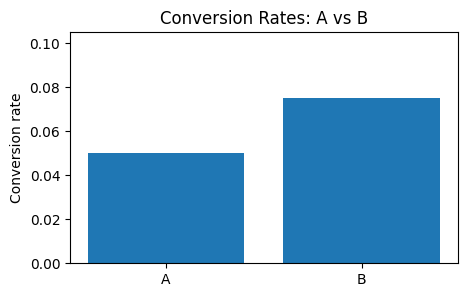

In [5]:
import math  # Import the math module
from scipy import stats # Import stats from scipy
import matplotlib.pyplot as plt # Import matplotlib for plotting


n_A = 5000
x_A = 250   # conversion rate = 250/5000 = 0.05 (5%)
n_B = 4800
x_B = 360   # conversion rate = 360/4800 = 0.075 (7.5%)

p_A = x_A / n_A
p_B = x_B / n_B
print(f"Campaign A: conversions = {x_A}/{n_A} = {p_A:.4f}")
print(f"Campaign B: conversions = {x_B}/{n_B} = {p_B:.4f}")

p_pool = (x_A + x_B) / (n_A + n_B)
se_pool = math.sqrt(p_pool * (1 - p_pool) * (1 / n_A + 1 / n_B))
z_stat = (p_B - p_A) / se_pool
p_value_one_sided = 1 - stats.norm.cdf(z_stat)

print("\nHypothesis setup:")
print("H0: p_B = p_A (no difference in conversion rates)")
print("H1: p_B > p_A (variant B has higher conversion)")
print(f"z-statistic = {z_stat:.4f}")
print(f"one-sided p-value = {p_value_one_sided:.6f}")

alpha = 0.05
if p_value_one_sided < alpha:
    print("Decision: Reject H0 → Campaign B significantly outperforms A (higher conversion)." )
else:
    print("Decision: Fail to reject H0 → Not enough evidence to claim B is better.")

plt.figure(figsize=(5,3))
plt.bar(['A', 'B'], [p_A, p_B])
plt.title("Conversion Rates: A vs B")
plt.ylabel("Conversion rate")
plt.ylim(0, max(p_A, p_B) * 1.4)
plt.show()

---
**End of notebook.**

This notebook demonstrates practical, simple implementations of:
- Probability Distributions (discrete + continuous)
- Bayes' Theorem (medical + spam examples)
- Hypothesis Testing (two-sample t-test)
- Confidence Interval (t-based 95% CI)
- A/B Testing (two-proportion z-test)

You can edit parameters and re-run cells in Colab for classroom exercises.
